In [17]:
import requests
import datetime
import pandas as pd
from tqdm import tqdm


In [9]:
files = [('green_tripdata_2024-03.parquet', './data'), ('green_tripdata_2022-01.parquet', './data')]

print("Download files:")
for file, path in files:
    url=f"https://d37ci6vzurychx.cloudfront.net/trip-data/{file}"
    resp=requests.get(url, stream=True)
    save_path=f"{path}/{file}"
    with open(save_path, "wb") as handle:
        for data in tqdm(resp.iter_content(),
                        desc=f"{file}",
                        postfix=f"save to {save_path}",
                        total=int(resp.headers["Content-Length"])):
            handle.write(data)

Download files:


green_tripdata_2022-01.parquet: 100%|███████████████████| 1254291/1254291 [00:09<00:00, 134472.76it/s, save to ./data/green_tripdata_2022-01.parquet]


In [4]:
!mkdir data

In [10]:
jan_data = pd.read_parquet('data/green_tripdata_2024-03.parquet')

In [11]:
jan_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,57457.000000,57457,57457,55360.000000,57457.000000,57457.000000,55360.000000,57457.000000,57457.000000,57457.000000,57457.000000,57457.000000,57457.000000,0.0,57457.000000,57457.000000,55360.000000,55353.000000,55360.000000
mean,1.877334,2024-03-16 04:02:52.405399,2024-03-16 04:21:00.076039,1.179986,95.524688,138.629149,1.309538,13.522828,17.313474,0.904472,0.577410,2.386255,0.192537,NaN,0.979378,22.904832,1.321062,1.038047,0.737730
min,1.000000,2008-12-31 23:02:24,2008-12-31 23:02:30,1.000000,1.000000,1.000000,0.000000,0.000000,-295.080000,-2.500000,-0.500000,-1.560000,0.000000,NaN,-1.000000,-296.080000,1.000000,1.000000,-2.750000
25%,2.000000,2024-03-08 13:53:56,2024-03-08 14:13:49,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.440000,1.000000,1.000000,0.000000
50%,2.000000,2024-03-15 22:49:01,2024-03-15 23:09:52,1.000000,75.000000,138.000000,1.000000,1.790000,13.500000,0.000000,0.500000,2.000000,0.000000,NaN,1.000000,18.500000,1.000000,1.000000,0.000000
75%,2.000000,2024-03-23 20:11:25,2024-03-23 20:34:48,1.000000,97.000000,220.000000,1.000000,3.100000,19.800000,1.000000,0.500000,3.610000,0.000000,NaN,1.000000,27.050000,2.000000,1.000000,2.750000
max,2.000000,2024-04-01 00:01:45,2024-04-01 16:11:00,99.000000,265.000000,265.000000,9.000000,125112.200000,841.600000,10.000000,4.250000,150.000000,26.760000,NaN,1.000000,856.980000,5.000000,2.000000,2.750000
std,0.328056,NaN,NaN,1.356719,57.285088,76.295346,0.967749,770.416255,14.958249,1.382446,0.366916,3.159273,1.184551,NaN,0.154253,17.013735,0.497858,0.191311,1.218039


Q1 - How many rows are there?

In [13]:
jan_data.shape

(57457, 20)

In [20]:
!pip install evidently



In [22]:
from evidently.metrics import ColumnQuantileMetric

# Monitor the median of the "fare_amount" column
median_metric = ColumnQuantileMetric(column_name="fare_amount", quantile=0.5)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [23]:
!pip install --upgrade numpy


In [24]:
!pip uninstall pandas evidently scikit-learn -y

Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: evidently 0.6.6
Uninstalling evidently-0.6.6:
  Successfully uninstalled evidently-0.6.6
Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2


In [25]:
!pip install pandas evidently scikit-learn

  Using cached pandas-2.2.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached evidently-0.6.6-py3-none-any.whl (3.5 MB)
     |████████████████████████████████| 13.5 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 61.9 MB/s eta 0:00:01


  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [2]:
!pip install numpy==1.23.5


     |████████████████████████████████| 17.1 MB 1.4 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [3]:
!pip install --upgrade evidently pandas numexpr dask xarray


     |████████████████████████████████| 396 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.8 MB/s  eta 0:00:01


  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: partd
    Found existing installation: partd 1.2.0
    Uninstalling partd-1.2.0:
      Successfully uninstalled partd-1.2.0
  Attempting uninstall: xarray
    Found existing installation: xarray 0.20.1
    Uninstalling xarray-0.20.1:
      Successfully uninstalled xarray-0.20.1
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.8.1
    Uninstalling numexpr-2.8.1:
      Successfully uninstalled numexpr-2.8.1
  Attempting uninstall: dask
    Found existing installation: dask 2022.2.1
    Uninstalling dask-2022.2.1:
      Successfully uninstalled dask-2022.2.1
ERROR: pip's dependency resolver does not currently take into account all the p

In [1]:
!pip uninstall numpy -y

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5


In [2]:
!pip install numpy==1.23.5


  Using cached numpy-1.23.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [3]:
!pip install --upgrade scikit-image


     |████████████████████████████████| 14.9 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 315 kB 60.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 69.2 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 84.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 80.3 MB/s eta 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1
  Attempting uninstall: tifffile
    Found existing installation: tifffile 2021.7.2
    Uninstalling tifffile-2021.7.2:
      Successfully uninstalled tifffile-2021.7.2
  Attempting uninstall: networkx
    Found existing installation: networkx 2.7.1
    Uninstalling networkx-2.7.1:
      Successfully uninstalled networkx-2.7.1
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
  Attempting unins

In [8]:
!pip install evidently

  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)


  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.


Q2. Metric

What metric did you choose?


Answer: ColumnCorrelationsMetric

Q3. Monitoring


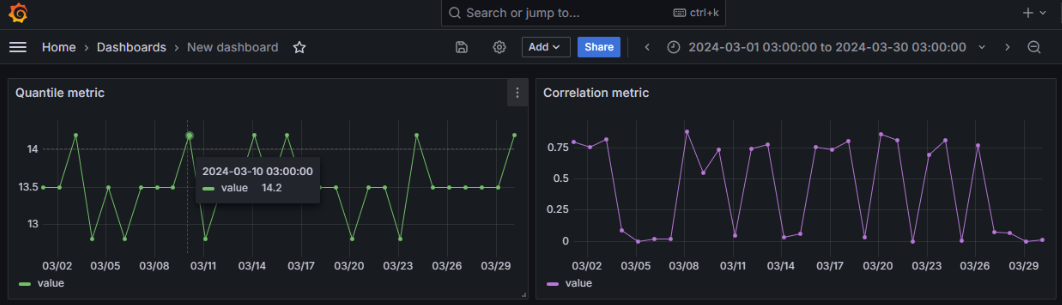

Answer: 14.2

Q4. Dashboard

Where to place a dashboard config file?


Answer: project_folder/dashboards